In [1]:
import json
import itertools
from basics import *
from plotting import *
from matplotlib import cm
from ase import Atoms
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from plotting import savefig

plt.style.use("paper")

## Visualizing the Monte Carlo approach

In [39]:
facets = [100, 111, 211, 331, 410, 711]
nads = np.arange(2, 24)
num_sites = {100: 16, 111: 16, 211: 24, 331: 24, 410: 24, 711: 16}

In [49]:
df = pd.read_csv("../data/03-copper-mcmc/energies.csv.gz", compression="gzip", index_col=0)

In [50]:
len(df)

14446334

In [51]:
energies = {}

for (facet, nads), grp in df.groupby(["facet", "nads"]):
    e = grp["energy"].values
    e = np.round(e, 5)
    e = np.sort(np.unique(e))
    
    energies[(facet, nads)] = e

In [52]:
num_configs = [
    len(e[:10])
    for (facet, n), e in energies.items()
]

In [53]:
sum(num_configs)

1043

In [68]:
df["energy"].apply(lambda x: np.round(x, 5))

0       -1.12959
1       -0.99730
2       -0.95802
3       -1.12959
4       -0.97118
          ...   
1624     5.09423
1625     9.61793
1626    13.13236
1627    15.60314
1628     8.12220
Name: energy, Length: 14446334, dtype: float64

## Coverage binding curves

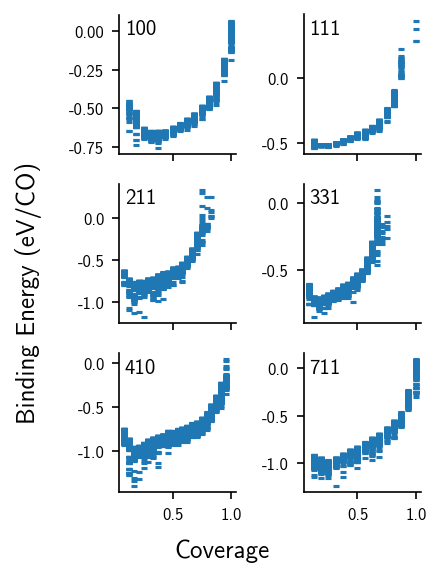

In [66]:
fig, axs = plt.subplots(3, 2, figsize=(3, 4), sharex=True)

for facet, ax in zip(facets, axs.reshape(-1)):
    _x, _y = [], []
    for (kf, n), e in energies.items():
        if n > num_sites[facet]:
            continue
            
        if kf == facet:
            _e = np.sort(e)[:100]
            _x.append(np.ones_like(_e) * n / num_sites[facet])
            _y.append(_e / n)

    _x = np.concatenate(_x, axis=0)
    _y = np.concatenate(_y, axis=0)
    
    ax.scatter(_x, _y, marker="_", s=10)
    ax.annotate(facet, (0.05, 0.97), xycoords='axes fraction', va="top")
#     ax.set_ylim(-1.5, 0.5)
    
fig.supylabel("Binding Energy (eV/CO)", x=0.04)
fig.supxlabel("Coverage", y=0.05)
fig.tight_layout()

# savefig(fig, "04-coverage-facets.pdf")
plt.show()